# Data Cleaning and Preparation for Sales Analysis
This notebook demonstrates the process of cleaning and preparing the Global Superstore dataset for further analysis. The dataset contains sales data, customer information, product details, and shipping data. The goal is to clean the dataset by handling missing values, duplicates, outliers, and data type issues before conducting deeper analysis.

## Loading the Data
We start by loading the dataset from a CSV file and taking an initial look at the first few rows to understand its structure.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/superstore.csv')

## Exploratory Data Analysis
Before cleaning the data, we check the basic structure and summary statistics to understand the dataset's features. This includes column names, data types, and any potential issues.

In [2]:
# Get the first 5 rows of the spreadsheet
print(df.head())

# Get the shape of the spreadsheet
print(df.shape)

# Get the column names of the spreadsheet
print(df.columns)

# Get summary statistics for each column to understand data distribution
print(df.describe())

          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  记录数               Order.Date        Order.ID  ... Sales  \
0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813  ...    19   
1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614  ...    19   
2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...    21   
3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...   111   
4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-146969  ...     6   

    Segment                Ship.Date       S

## Renaming the column with Chinese
We can see that there is a column name with Chinese character from the column names and we will use googletrans for translating

In [3]:
# Translate column name from Chinese to English using googletrans
from googletrans import Translator

# Rename the '记录数' column to 'Number of records' after translation
translator = Translator()
df.rename(columns={'记录数': translator.translate('记录数', src='zh-cn', dest='en').text}, inplace=True)

## Handling Missing Data
We will check for missing values across all columns and decide how to handle them. Since this dataset does not contain any missing values, we will proceed to the next step.

In [4]:
# check for missing values
df.isnull().sum()

Category             0
City                 0
Country              0
Customer.ID          0
Customer.Name        0
Discount             0
Market               0
Number of records    0
Order.Date           0
Order.ID             0
Order.Priority       0
Product.ID           0
Product.Name         0
Profit               0
Quantity             0
Region               0
Row.ID               0
Sales                0
Segment              0
Ship.Date            0
Ship.Mode            0
Shipping.Cost        0
State                0
Sub.Category         0
Year                 0
Market2              0
weeknum              0
dtype: int64

## Handling Duplicates
Duplicate entries can affect analysis. We check and remove any duplicate rows from the dataset to ensure that we are working with unique data.

In [5]:
#check for duplicates
df.duplicated().sum()

0

## Data Type Optimization
To optimize memory usage and improve performance, we convert categorical columns to the `category` data type.

In [6]:
# Optimize categorical columns by changing them to 'category' data type
cat_cols = ['Category', 'City', 'Country', 'Market', 'Market2', 'Segment', 'Ship.Mode', 'State', 'Sub.Category', 'Order.Priority']
df[cat_cols] = df[cat_cols].astype('category')

## Data types check and changing the data type
We will check the data types for the columns and change the data type if needed

In [7]:
# check data types
df.dtypes

Category             category
City                 category
Country              category
Customer.ID            object
Customer.Name          object
Discount              float64
Market               category
Number of records       int64
Order.Date             object
Order.ID               object
Order.Priority       category
Product.ID             object
Product.Name           object
Profit                float64
Quantity                int64
Region                 object
Row.ID                  int64
Sales                   int64
Segment              category
Ship.Date              object
Ship.Mode            category
Shipping.Cost         float64
State                category
Sub.Category         category
Year                    int64
Market2              category
weeknum                 int64
dtype: object

In [8]:
# Convert 'Order.Date' and 'Ship.Date' to datetime format for better manipulation
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

## Outlier Handling (Winsorization)
Outliers can distort analysis and lead to misleading results. In this notebook, we handle outliers by applying Winsorization, which caps values above the 95th percentile and below the 5th percentile.

In [9]:
# Outlier check: Get basic statistics for numerical columns
df[['Sales', 'Profit', 'Discount', 'Shipping.Cost']].describe()

,Sales,Profit,Discount,Shipping.Cost
count,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.498440,28.610982,0.142908,26.375818
std,487.567175,174.340972,0.212280,57.296810
min,0.000000,-6599.978000,0.000000,0.002000
25%,31.000000,0.000000,0.000000,2.610000
50%,85.000000,9.240000,0.000000,7.790000
75%,251.000000,36.810000,0.200000,24.450000
max,22638.000000,8399.976000,0.850000,933.570000


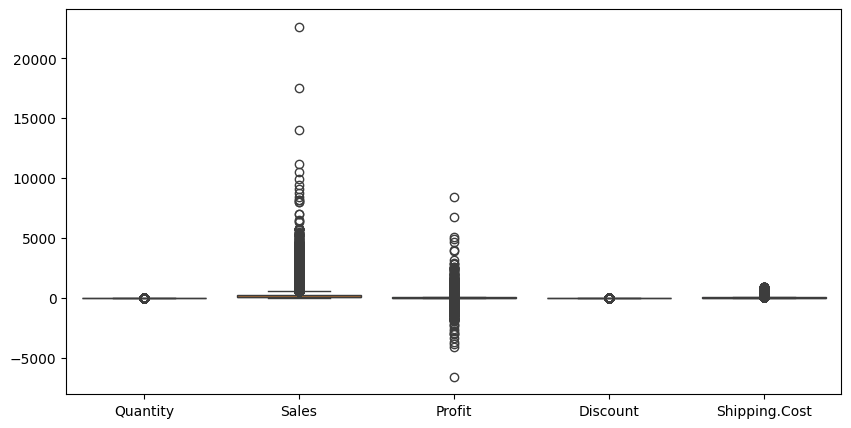

In [10]:
# Visualize potential outliers in numerical columns using a boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Quantity','Sales', 'Profit', 'Discount', 'Shipping.Cost']])
plt.show()

In [11]:
# Outlier treatment using Winsorization: We will cap extreme values to a specific percentile range (e.g., 5th to 95th percentile)
import numpy as np
# winsorization for outliers
numeric_columns = ['Sales', 'Profit', 'Quantity', 'Discount']

# Define the lower and upper percentiles
lower_percentile = 5
upper_percentile = 95

# Apply Winsorization to each numeric column
for column in numeric_columns:
    lower_limit = np.percentile(df[column], lower_percentile)
    upper_limit = np.percentile(df[column], upper_percentile)
    
    # Cap the outliers using the clip function
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)

In [12]:
# Display the cleaned dataset's first 5 rows to confirm the changes

print(df.head())

          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  Number of records Order.Date        Order.ID  ... Sales  \
0       0.0     US                  1 2011-01-07  CA-2011-130813  ...    19   
1       0.0     US                  1 2011-01-21  CA-2011-148614  ...    19   
2       0.0     US                  1 2011-08-05  CA-2011-118962  ...    21   
3       0.0     US                  1 2011-08-05  CA-2011-118962  ...   111   
4       0.0     US                  1 2011-09-29  CA-2011-146969  ...     9   

    Segment  Ship.Date       Ship.Mode  Ship

## Saving the Cleaned Dataset
After performing all the necessary data cleaning steps, we save the cleaned dataset to a new CSV file for future analysis.


In [13]:
# Save the cleaned dataframe to a new CSV file
df.to_csv('../data/cleaned_superstore.csv', index=False)

# Check if the file has been saved correctly
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


# Conclusion
In this notebook, we've successfully cleaned and prepared the dataset. The next step will be to perform detailed analysis and visualizations based on this cleaned data.